# Data Analysis for Bike-sharing Company
In this analysis, we are trying to understand and predict daily bike rentals for a bike-sharing company. The dataset we are using contains daily rentals, dates, and weather indicators in 2011 and 2012. We will use linear regression to find the most influencial factors that affects the company's daily bike rentals, and then create a model to achieve our rental predictions.

## Data Preparation
### Import Python Libraries
Python libraries help to extend the Python programming language, which can help make our tasks easier. For our purpose, we will import "**numpy**" for statistics, "**pandas**" to load and manipulate data, "**seaborn**" to create graphs, and "**sklearn**" to build linear regression models.

In [ ]:
#import Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = "darkgrid")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

### Load Bike Rentals Data
Firstly, we need to load our dataset to Python in order to leverage Python tools to analyze it. Since our dataset has been stored in the cloud on GitHub, we will use "**pandas**" library (the one we just imported) and the dataset's URL link to access it. We will save our dataset to the name called "df_bike". The following analysis shows the dimensions and data types of our dataset. Overall, the dataset has 731 rows and 14 columns.

In [ ]:
#load csv files
df_bike = pd.read_csv("http://bit.ly/bike-data")

In [ ]:
#calculate the dimensions in the dataset
df_bike.shape

(731, 14)

In [ ]:
#list the columns in the dataset along with their data types
df_bike.dtypes

ID                      int64
date                   object
yr                      int64
mnth                    int64
weekday                 int64
season                  int64
holiday                 int64
working_day             int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual_rentals          int64
registered_rentals      int64
dtype: object

In [ ]:
#preview the first 5 records of the dataset
df_bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


### Combine Casual Rentals and Registered Rentals
In our dataset, we have casual rentals (use bikes as needed) and registered rentals (registered in the bike system). Since we are focusing on predicting total bike rentals, we create a new column called "total_rentals" to sum up our casual rentals and registered rentals.

In [ ]:
#create a new column called "total_rentals"
df_bike["total_rentals"] = df_bike["casual_rentals"] + df_bike["registered_rentals"]

In [ ]:
#preview the first 5 records of the updated dataset
df_bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Generate Descriptive Stats
We will use the "describe" function in Python to outline a breif data summary of our dataset. As we can see from the sheet, some of the columns might seem unusual compare to our common sense (ex. "yr", "holiday"...), this is because these columns only contains 1 and 0. For example, in "holiday" column, 1 means that day is a holiday, and 0 means that day is a working day.

In [ ]:
#generate descriptive stats for the numeric columns in the dataset
df_bike.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Summarize Total Rentals by Year and Month
In order to better compare our total rentals in different months and years, we will use a pivot table to calculate total rentals and average rentals for each month and each year.

In [ ]:
#create a pivot table that shows the sum and mean of total rentals by month and year
pd.pivot_table(df_bike, index = ["yr", "mnth"], values = ["total_rentals"], aggfunc = [np.sum, np.mean])

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

In [ ]:
#determine whether or not there are any missing values in the dataset
df_bike.isnull().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

## Data Visualization
### Distribution of Total Rentals
As we can see from the following histogram, the number of total rentals distributes between 0 to 9,000, and it is normally distributed.

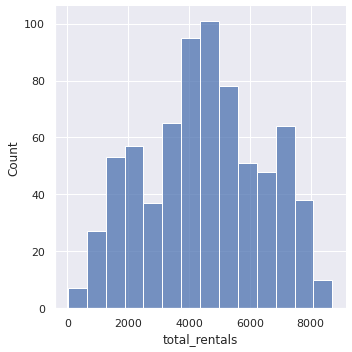

In [ ]:
#distribution of total rentals (histogram)
sns.displot(df_bike, x = "total_rentals");

### Relationship between Casual Rentals and Registered Rentals
From this scatterplot, we can see that the casual rentals and registered rentals are **positively correlated**. As casual rentals increase, registered rentals increase. Meanwhile, for the same amount of casual rentals, the amount of registered rentals will be much higher in working day than holiday. We could interpret that people are more likely to register in the system during working days, and more likely to have casual rentals during weekend.

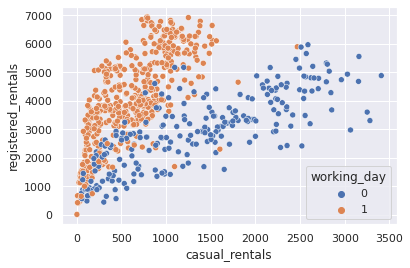

In [ ]:
#relationship between casual rentals and registered rentals (scatterplot)
sns.scatterplot(x = "casual_rentals", y = "registered_rentals", data = df_bike, hue = "working_day");

### Visualize total rentals by Seasons
According to this swarmplot, we find that during the winter, most of the points (represent average daily rentals) clustered around 2,000, while during the spring/summer/fall, most points are around 4,000 or higher. We could infer that people are more likely to rent a bike during the seasons that have higher temperature, such as summer, and less likely to rent a bike during the seasons that have lower temperature, such as winter. 

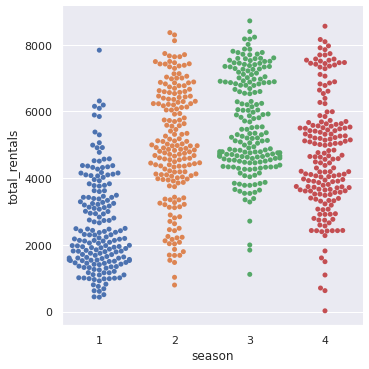

In [ ]:
#total rentals by seasons (swarmplot)
sns.catplot(x = "season", y = "total_rentals", kind = "swarm", data = df_bike);

### Change of Total Rentals by Month and Year
This is a line plot shows the changes of total rentals throughout the years. In both years we can see an increase of total rentals from January to June, and a decrease from September to December. Besides, 2012's overall total rentals are higher than 2011's.

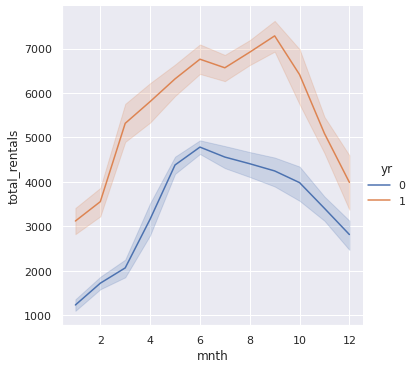

In [ ]:
#average daily rentals by month and year (line plot)
sns.relplot(x = "mnth", y = "total_rentals", hue = "yr", kind = "line", data = df_bike);

### Relationship between Total Rentals and Weather Indicators
This pair plot shows the relationship between the total rentals and weather indicators: temperature, humidity, windspeed. We can see as temperature increases ("temp"/"atemp"), the amount of total rentals increases. While for the other two variables, they didn't show a high correlation relate to total rentals.


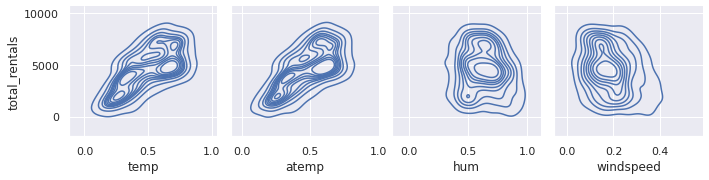

In [ ]:
#relationship between total rentals and weather indicators (pairplot)
sns.pairplot(df_bike, y_vars = ["total_rentals"], x_vars = ["temp", "atemp", "hum", "windspeed"], kind = "kde");

### Correlation between Total Rentals and the Weather Indicators
We also create a heatmap to better visualize the correlation between these variables. In this case, we can see the correlation between total rentals and temperature is 0.63, which is greater than 0.5. However, the correlation between total rentals and humidity/windspeed is pretty low. Therefore, we conclude that **the temperature is the most influencial factor in our dataset**.

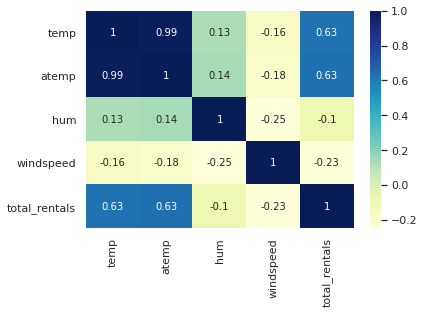

In [ ]:
#correlation between total rentals and the weather indicators (heatmap)
df_bike_new = df_bike.drop(columns = ["ID", "yr", "mnth", "weekday", "holiday", "working_day", "casual_rentals", "registered_rentals", "season"])
sns.heatmap(df_bike_new.corr(), cmap="YlGnBu", annot = True)

## Linear Regression Analysis
### Build the Model
After finding the most influencial factor ("temp"), we will build a linear regression model based on our previous analysis. Firstly, we will separate the dependent variable ("total_rentals") and independent variable ("temp"). Then we will split our data into training data and test data. We will use the training data to build the regression model, and use the test data to evaluate how good our model can predict bike rentals.

In [ ]:
#separate the dependent variable and independent variables
X = df_bike[["temp"]]
y = df_bike["total_rentals"]

In [ ]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#train the linear regression model using training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#identify the intercepts of the regression model
model.intercept_

1327.930810368468

In [ ]:
#identify the coefficients of the regression model
model.coef_

array([6463.96764523])

### Predict Rentals
After building our regression model, we know that the intercept of our model is 1327.93, while the coefficient is 6463.97. We can use this model to predict total rentals. For example, when "temp" equals 0.3, the predicted value would be 3267.12.

In [ ]:
#use the regression model to predict “total_rentals” when "temp" = 0.30
new_X = [[0.30]]
model.predict(new_X)

array([3267.12110394])

### Applying Regression Model to Test Data
We will use "predict" function in Python to predict total rentals for test data. 

In [ ]:
#use the regression model to predict total bike rentals in the test data
y_pred = model.predict(X_test)
y_pred

array([5766.52408142, 6175.90654429, 2836.18777293, 2570.13732862,
       3536.45524381, 4279.81152301, 4365.99560363, 4252.87616984,
       4155.91665516, 2643.20601889, 2260.99161202, 3428.72029507,
       3683.06449397, 5901.18791937, 6154.36214013, 5432.55026509,
       5098.57644877, 3843.49370696, 3288.6655081 , 4110.24872374,
       5895.80343432, 2965.46712584, 3391.01597179, 5804.22840469,
       2378.32555272, 5437.93475014, 6811.52787475, 5572.60505206,
       4748.44917729, 5098.57644877, 2222.11084664, 5561.829618  ,
       4215.17184656, 5820.38832381, 3741.14324327, 3369.46510367,
       6348.28116949, 6897.71841933, 4010.47738314, 4290.58049311,
       5012.39236815, 3677.44084212, 5314.04634625, 3961.9976258 ,
       5965.82759582, 4651.48966262, 3092.87192813, 5680.33353684,
       3035.49775131, 2963.59257522, 5933.5077576 , 6122.04230191,
       4328.29128035, 5567.21410304, 5917.34783848, 4295.97144213,
       3428.72029507, 4274.420574  , 6052.01167644, 3046.26672

### Prediction Evaluation
In statitics, the R-squared is a great tool to evaluate how close the data are to the regression line. The R-squared values range from 0 to 1. An R-squared of 1 means that all movements of a security (or another dependent variable) are completely explained by movements in the index. In our analysis, we have an R-squared of 0.375, which means that 37.5% of the variability in the outcome data can be explained by the model, while the rest 62.5% of the variability depends on other factors. In a nutshell, we are mostly focusing on environmental factors during our analysis, such as temperature and humidity, but there are other factors might also influence customer's bike rental choices, such as marketing, company's rating, etc. Therefore, more detailed analysis can be explored in the future.

In [ ]:
#r squared
metrics.r2_score(y_test, y_pred)

0.37540464616240454